# Anexo - Catálogo de gráficas I



## Minería de Datos 2017/2018 - Jacinto Arias y José A. Gámez

En este anexo presentaremos distintos modelos de gráficas que podéis incluir en vuestros estudios.

In [1]:
# Antes de empezar es fundamental cargar las librerias de python!
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

In [2]:
# Configuracion para seaborn
%matplotlib inline
mpl.rcParams["figure.figsize"] = "8, 4"
import warnings
warnings.simplefilter("ignore")

------------

Vamos a usar el dataset iris para el que discretizaremos las variables `sepal_width` `petal_width`para poder trabajar con variables numéricas y categóricas.

In [3]:
# Actualizar la ruta del fichero si no coincide:
df = pd.read_csv("../data/iris.csv")

# Ahora discretizamos:
df['petal_width'] = pd.cut(df['petal_width'], bins=3)
df['sepal_width'] = pd.cut(df['sepal_width'], bins=3)

## Variables numéricas, gráficos univariados / distribución de la clase:

#### DISTRIBUCIÓN DE UNA VARIABLE NUMERICA

El gráfico más directo como hemos visto es el de mostrar la distribución de una variable numérica:

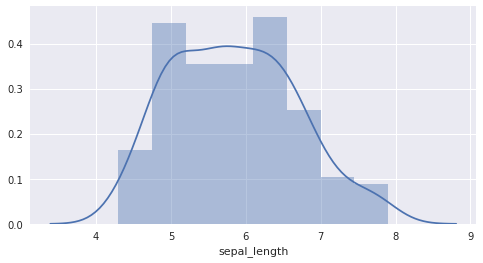

In [9]:
def gSingleHistogram(targetdf, att):
    sns.distplot(targetdf[att])

gSingleHistogram(df, "sepal_length")

#### DISTRIBUCIÓN CONDICIONADA A LA CLASE

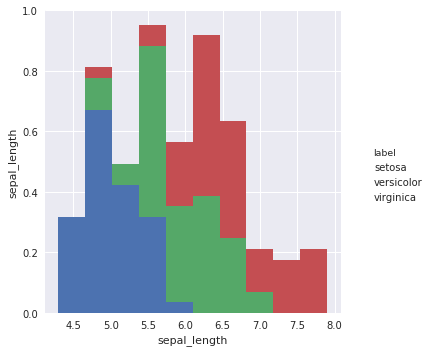

In [10]:
def gSingleConditionalHistogram(targetdf, att):
    sns.pairplot(targetdf[[att, 'label']], hue="label", size=5)
    
gSingleConditionalHistogram(df, "sepal_length")

#### DISTRIBUCIÓN CONDICIONADA A LA CLASE - CAJAS Y BIGOTES
Muestra la distribución deacuerdo a la distancia entre primer y tercer cuartil, así como la mediana (linea negra) y la distancia proporcional al espacio intercuartilico, además muestra los outliers como puntos independientes.

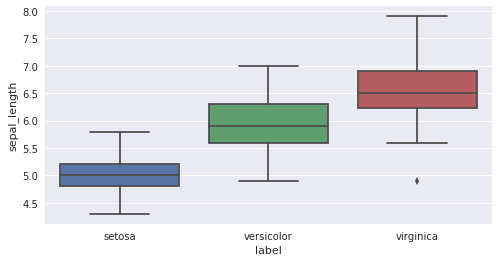

In [17]:
def gSingleBoxplot(targetdf, att):
    sns.boxplot(x='label', y=att, data=targetdf)
    
gSingleBoxplot(df, "sepal_length")


## Variables categoricas, gráficos univariados / distribución de la clase:


#### DISTRIBUCIÓN DE UNA VARIABLE CATEGÓRICA

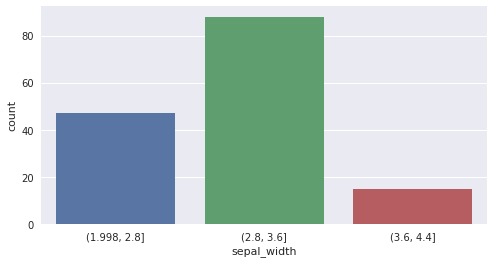

In [20]:
def gSingleBarplot(targetdf, att):
    sns.countplot(targetdf[att])

gSingleBarplot(df, "sepal_width")

#### VARIABLE CATEGORICA CONDICIONADA A LA CLASE:

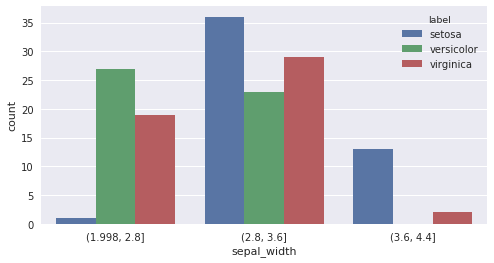

In [21]:
def gConditionalBarplot(targetdf, att):
    sns.countplot(x=att, hue="label", data=targetdf);

gConditionalBarplot(df, "sepal_width")

### Gráficas bivariadas

#### NUBE DE PUNTOS (SCATTERPLOT) - CONTINUA VS CONTINUA

Representa cada variable en un eje y colorea cada punto con el color de la clase:

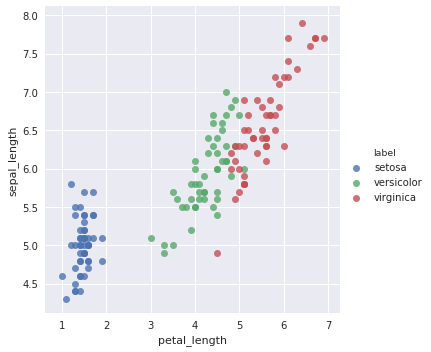

In [22]:
def gConditionalScatter(targetdf, attx, atty):
    sns.lmplot(x=attx, y=atty, hue="label", data=targetdf,  fit_reg=False);

gConditionalScatter(df, "petal_length", "sepal_length")


#### CONTINUA VS NUMÉRICA - CAJAS Y BIGOTES

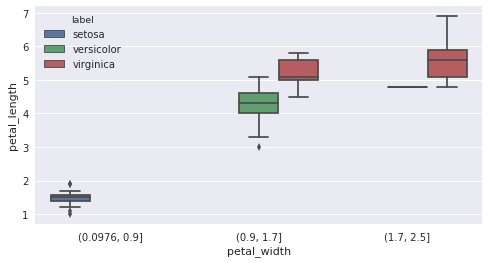

In [25]:
def gConditionalBoxplot(targetdf, attx, atty):
    sns.boxplot(x=attx, y=atty, hue='label', data=targetdf)

gConditionalBoxplot(df, "petal_width", "petal_length")
